### Title

Predict the genre of a given song based on danceability, and energy


### Introduction

Identify and describe the dataset that will be used to answer the question
The question we want to answer with our project is: “What is the genre of a given song based on its danceability and energy values?” This is a classification question, which uses one or more variables to predict the value of a categorical variable of interest. We will be using the K-nearest neighbours algorithm to predict the genre for our chosen songs. This algorithm tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then we select the K number of points which is closest to the test data. The algorithm then calculates the probability of the test data belonging to the classes of ‘K’ training data and the class that has the highest probability will be selected. The dataset we will be using is “Dataset of songs in Spotify'' from Kaggle. This dataset has 22 columns titled: danceability, energy, key, loudness, mode, speechless, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, and song_name. The full list of genres includes Trap, Techno, Techhouse, Trance, Psytrance, Dark Trap, DnB (drums and bass), Hardstyle, Underground Rap, Trap Metal, Emo, Rap, RnB, Pop and Hiphop. We will be using danceability (from 0-0.99), energy (from 0-1) and genre in our project. 


### Preliminary exploratory data analysis

In [1]:
library(readr)
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ dplyr   1.1.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ tidyr   1.3.0     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ rec

In [2]:
urlfile="https://raw.githubusercontent.com/brandonzchen/GroupProjDSCI/main/genres_v2.csv"

mydata<-read_csv(url(urlfile))

Rows: 42305 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): type, id, uri, track_href, analysis_url, genre, song_name, title
dbl (14): danceability, energy, key, loudness, mode, speechiness, acousticne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#This is the code for a summary of the information of the data

genres <- c("hardstyle", "Emo", "Hiphop")
datainformation <- mydata |>
    select(danceability, energy, genre) |>
    filter(genre %in% genres) |>
    group_by(genre) |>
    summarise(count = n(), mean_energy = mean(energy), mean_danceability = mean(danceability))

datainformation
              
              

genre     count mean_energy mean_danceability
1 Emo       1680  0.7611750   0.4936988        
2 Hiphop    3028  0.6544179   0.6989818        
3 hardstyle 2936  0.8962384   0.4780270

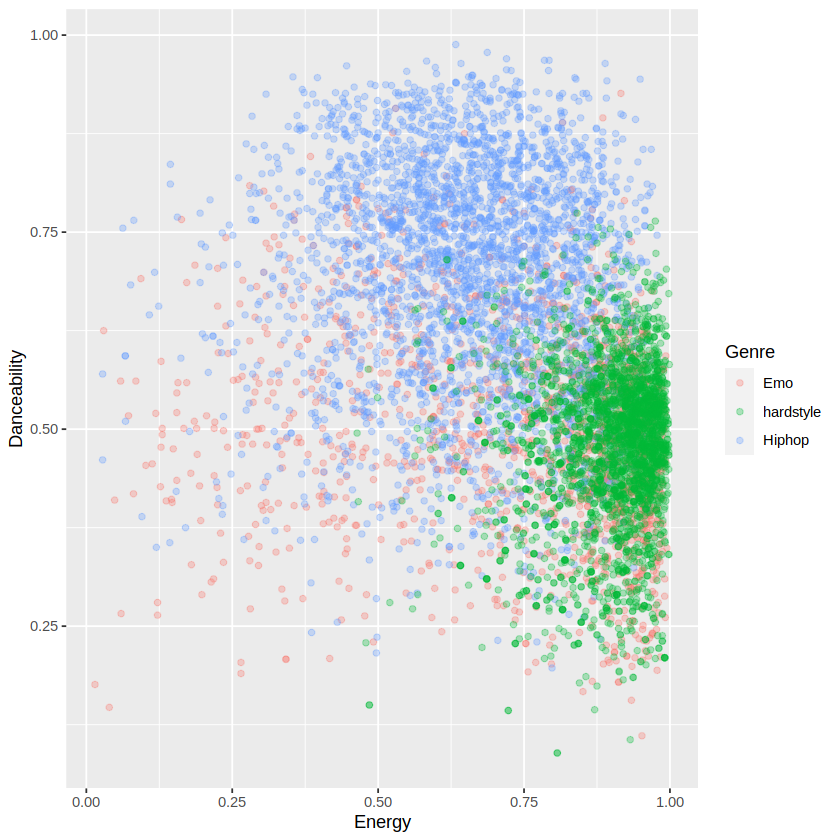

In [6]:
mydata <- mydata |>
    select(danceability, energy, genre) |>
    filter(genre %in% genres)

genre_plot <- mydata |>
    ggplot(aes(x = energy, y = danceability)) + 
        geom_point(alpha = 0.3, aes(colour = genre)) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("Energy") +
        ylab("Danceability") +
        labs(colour = "Genre")

genre_plot
        

### Methods

Using the “Dataset of songs in Spotify'' dataset, we will be conducting a K-NN classification on specific songs within the dataset to predict their genre. This will be done by specifically using “danceability” and “energy” as the predictor variables and “genre” as the response variable. We will first, filter our dataset to only include danceability, energy and genre as the only 3 variables, tidy the filtered data, and further shrink the dataset by selecting for 3 specific genres. We will then set aside specific songs from the dataset for future use in which the classification model will predict their genre. Afterwards, we will begin building, tuning, and evaluating our K-NN classification model. This will include dividing the data up into a training set and testing set, using the training set to both build and tune our model through cross-validation to give us a high accuracy K value, along with evaluating our chosen K value using our testing set. Finally, we will then use this classification model to predict the selected songs we initially set aside and graph this data using a scatter plot. This scatterplot will include the energy variable in the x-axis, danceability in the y-axis, color coding for each of the 3 genres, as well as a different color to indicate the songs we are predicting for.

### Expected outcomes and significance

What do you expect to find?
- Correlation between genre and danceability. 
- We might find that certain genres such as  “Hiphop” tend to have higher danceability, genres like “Hardstyle” could have lower danceability.

Correlation Between genre and energy.
- We might find certain genres such as “Hardstyle” could have higher energy, genres like “Emo” could have lower energy.
- Overlap in danceability and energy between different genres. 
- We expect to find that songs with relatively higher danceability and energy are more likely to belong to certain genres such as tech house, or trap music. Genres like dark trap may have lower values for these features.
- Also, we might find that songs with higher danceability are more likely to have lower energy, and songs with higher energy might have lower danceability.

What impact could such findings have?
- Music Recommendation.
- For the Music App most people use, these findings can improve the music recommendation system. By exploring the genre preference of the users and the danceability and energy of the songs they enjoy, it can help the system to provide more personalized recommendations.
- Finding Music for different Occasions.
- The users can use this information to select the appropriate music for different occasions. For example, high danceability and energy music are suitable for parties, and low danceability and energy music could be played for a relaxed environment. 

What future questions could this lead to?
- A More Accurate Genre Prediction Model
- We can consider more features of the music that influence different genres, such as tempo, key, or lyrics, to improve our model to have a more comprehensive and accurate prediction on genres.

Temporal Trends
- We can try to find out how the music evolves as time goes on by taking the years that the songs published into the investigation, analyze how the danceability and energy evolves for different genres over time, for example, does a certain genre become more danceable or energetic over time? 
